# فاز صفر:

با استفاده از تابع info می توان اطلاعات کلی مانند تعداد ستون و index های آن و تعداد سطر ها و index های آن ها و مقدار ستون ها و تعداد سطر هایی که برای یک ستون مقدار  دارند و null نیستند و نوع ستون ها را مشاهده کرد.

In [212]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import scipy.stats as stats
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
#from sklearn import datasets, linear_model

data1 = pd.read_csv('train.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

با استفاده از تابع describ می توان برای هر یک از ستون های عددی تعداد سطر هایی که مقدار دارند و میانگین و واریانس و مقدار مینیمم و ماکزیمم و اینگونه اطلاعات را به دست آورد. 

In [213]:
data1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


 در این مرحله با به دست آوردن تعداد خانه های خالی برای هر ستون درصد داده ی از دست داده شده را برای هر ستون محاسبه می کنیم. البته چون یکی از مقادیر ممکن برای ستون ها  مقدار None و Na است و این مقدار با داده ی گم شده اشتباهی حساب می شود لازم است از این اشتباه و جایگزین کردن آن با مقادیر دیگر جلوگیری کنیم.  

In [214]:

percent_missing = data1.isnull().sum() * 100 / len(data1)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.head(60)

,percent_missing
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


In [215]:
missing_value_df.tail(21)

,percent_missing
GarageFinish,5.547945
GarageCars,0.000000
GarageArea,0.000000
GarageQual,5.547945
GarageCond,5.547945
PavedDrive,0.000000
WoodDeckSF,0.000000
OpenPorchSF,0.000000
EnclosedPorch,0.000000
3SsnPorch,0.000000


به وسیله تابع زیر می توان همبستگی میان کلیه ی ستون های داده ها را محاسبه کرد.

In [216]:
data1.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


ایجاد یک نقشه حرارتی با استفاده از مقادیر همبستگی، نیازمند فراخواندن تابع heatmap و ارسال دیتافریم حاوی مقادیر همبستگی به آن است.رنگ هر خانه از جدول، به مقدار آن خانه بستگی دارد. مثلاً در نمودار زیر، چنانچه همبستگی بالایی میان دو ویژگی وجود داشته باشد، خانه یا جعبه متناظر، سفید است، از طرف دیگر، چنانچه همبستگی وجود نداشته باشد، خانه متناظر، سیاه باقی می ماند. این طیف رنگی از کمترین مقدار تا بیشترین مقدار تمام خانه های ماتریس تغییر میکند که در سمت راست جدول قابل مشاهده است. برای انتخاب ویژگی ها برای تخمین قیمت خانه بهتر است ویژگی هایی انتخاب شوند که قیمت خانه به آن ها وابستگی بیش تری دارد مانند overallQual , GrlivArea , Garagcars , GaragArea 

<AxesSubplot:>

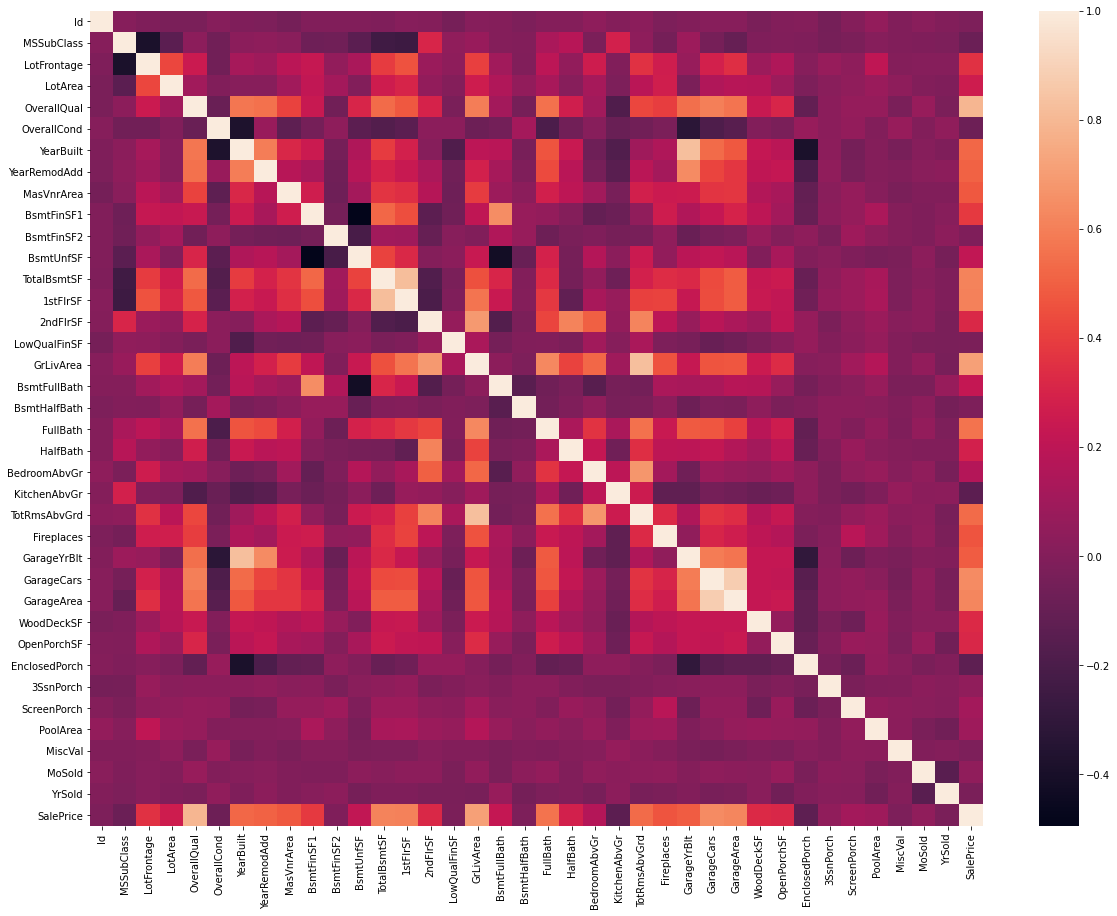

In [217]:
corr = data1.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

حالا از قیمت خانه ها لگاریتم می گیریم و سپس نمودار heatmap را دوباره برای آن رسم می کنیم و میبینیم که در کل با هم تفاوت خاصی ندارند.

<AxesSubplot:>

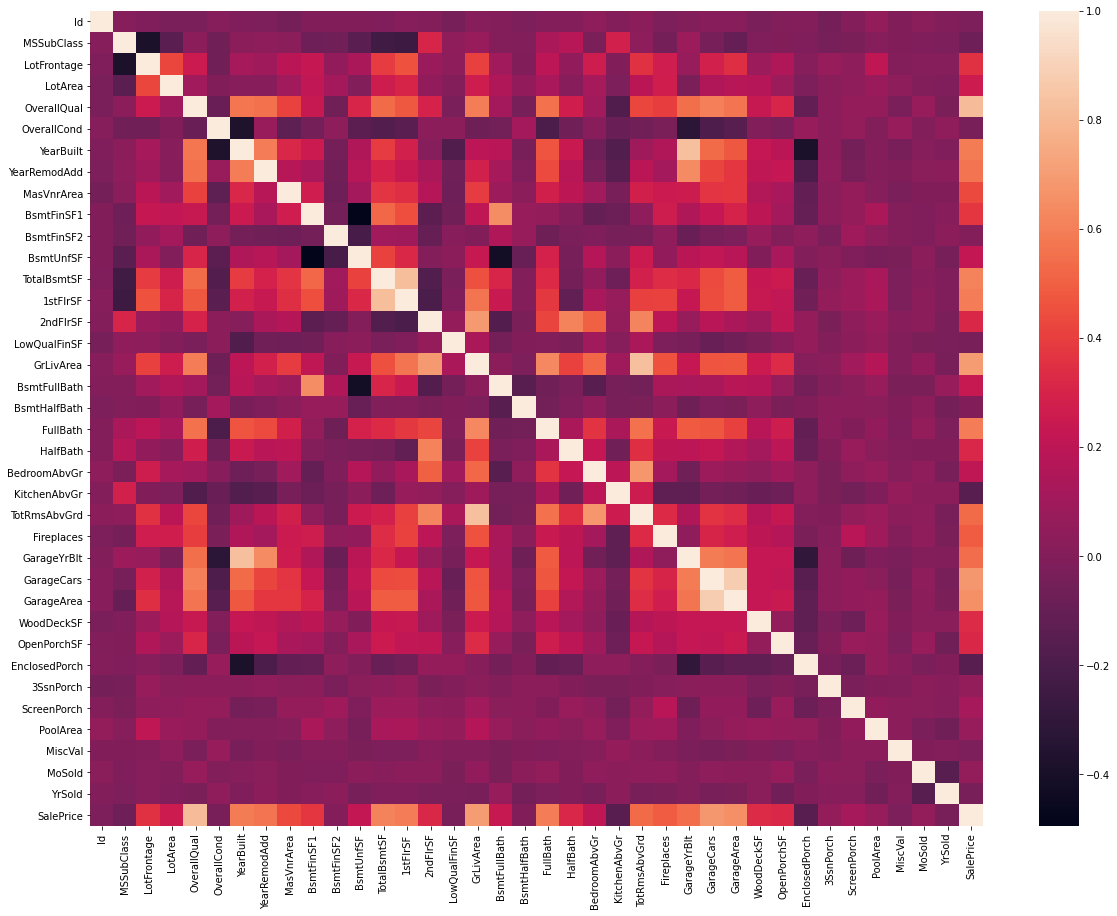

In [218]:
tempdata = pd.read_csv('train.csv')
tempdata['SalePrice'] = np.log(tempdata['SalePrice'])
tempcorr = tempdata.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(tempcorr)

استفاده از این نموداربه تنهایی برای انتخاب ویژگی ها کافی نیست چرا که بساری از ویژگی ها هستند که مقدار عددی ندارند و می توانند وابستگی زیادی به قیمت خانه داشته باشند که در این نمودار نمایش داده نمی شوند هم چنین ممکن است مثلا دو ویژگی داشته باشیم که آن ها به هم وابستگی زیادی داشته باشند و از روی یکی بتوان دیگری را پیش بینی کرد و قیمت خانه به هر دوی آن ها وابسته باشد در نتیجه اگر هر دوی این ویژگی ها را جز فیچر های مفید در تخمین قیمت خانه انتخاب شود در واقع می توان از روی تحلیل هر دوی آن ها به همان نتیجه ای رسید که با تحلیل یکی از آن ها هم می شد به آن نتیجه رسید.  

با استفاده از نمودار hexbin ارتباط بین ویژگی های انتخاب شده و قیمت خانه را مشاهده می کنیم.
مثلا همان طور که می بینیم هر چه OverallQual بیش تر شود یعنی متریال بهتری به کار رفته و کار ساخت خانه در زمان مطلوبی به پایان رسیده در نتیجه قیمت خانه بیش تر می شود
یا مثلا هر چه GrLivArea بیش تر باشد که یعنی از سطح زمین فاصله بیش تری دارد قیمت خانه بیش تر می شود.
همچنین هر چه سایز گاراژ هم از لحاظ مساحت و هم تعداد ماشینی که در آن جا می گیرد بیشتر شود قیمت خانه بیش تر می شود.

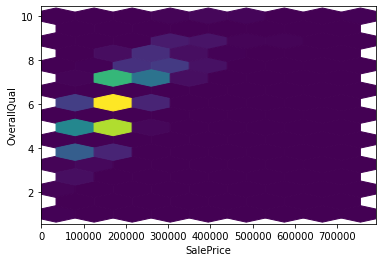

In [219]:
plt.hexbin(data1['SalePrice'],data1['OverallQual'] , gridsize=(8,8) )
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.show()

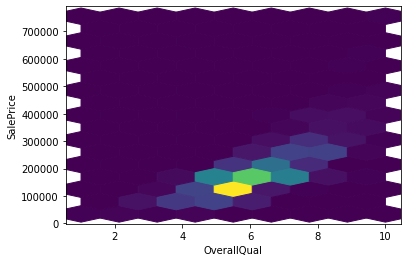

In [220]:
plt.hexbin(data1['OverallQual'],data1['SalePrice'] , gridsize=(8,8) )
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.show()

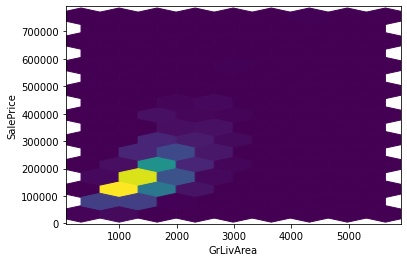

In [221]:
plt.hexbin(data1['GrLivArea'],data1['SalePrice'] , gridsize=(8,8) )
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

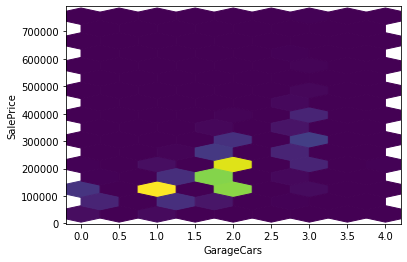

In [222]:
plt.hexbin(data1['GarageCars'],data1['SalePrice'] , gridsize=(8,8) )
plt.ylabel('SalePrice')
plt.xlabel('GarageCars')
plt.show()

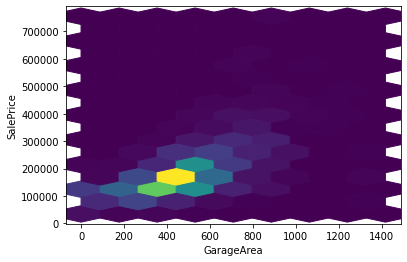

In [223]:
plt.hexbin(data1['GarageArea'],data1['SalePrice'] , gridsize=(8,8) )
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

حالا ارتباط 4 ویژگی را با قیمت خانه با استفاده از نمودار scatter بررسی می کنیم:
در همه ویژگی ها یک سری داده هستند که باعث می شوند به طور صد در صد پیش بینی ما صحیح نباشد. 

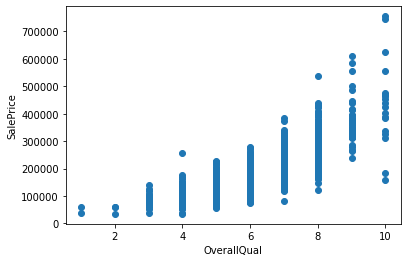

In [224]:
plt.scatter(data1['OverallQual'],data1['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.show()

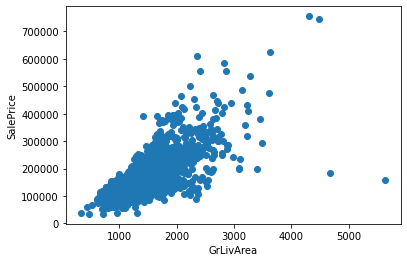

In [225]:
plt.scatter(data1['GrLivArea'],data1['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

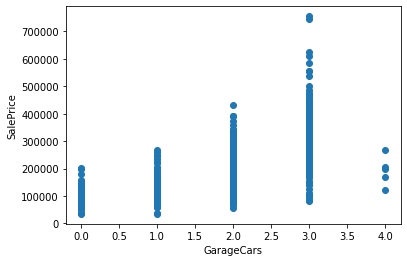

In [226]:
plt.scatter(data1['GarageCars'],data1['SalePrice'] )
plt.ylabel('SalePrice')
plt.xlabel('GarageCars')
plt.show()

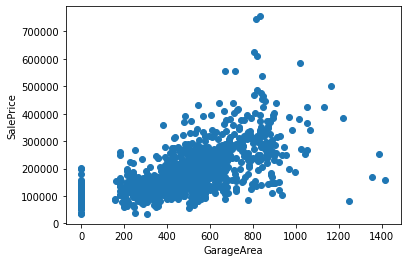

In [227]:
plt.scatter(data1['GarageArea'],data1['SalePrice'] )
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

حالا می خواهیم با استفاده از تعریف و توضیحات هر یک از ویژگی ها که در فایل data_description.txt آمده است حدس بزنیم که کدام ویژگی برای تعیین قیمت خانه موثر است و حدس های خود را با کمک نمودار ارتباط وابستگی بررسی کنیم.
با بررسی فایل مربوطه به نظر من سه ویژگی که می توانند در تعیین قیمت خانه موثر باشند عبارتند از:
LotFrontage که نشان دهنده ی میزان نزدیکی خیابان به خانه است. OverallCond که نشان دهنده وضعیت کلی خانه است و TotRmsAbvGrd که نشان دهنده ی تعداد اتاق هاست
که نمودار مربوط به آن ها هم به وسیه scatter و هم hexbin رسم شده است


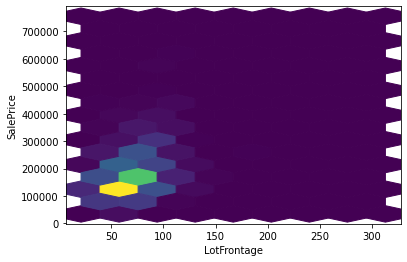

In [228]:
plt.hexbin(data1['LotFrontage'],data1['SalePrice'] , gridsize=(8,8) )
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
plt.show()

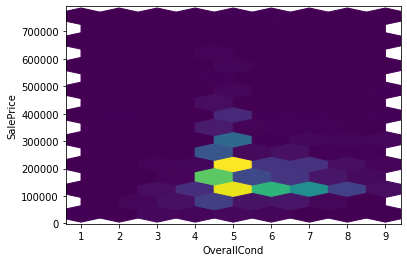

In [229]:
plt.hexbin(data1['OverallCond'],data1['SalePrice'] , gridsize=(8,8) )
plt.ylabel('SalePrice')
plt.xlabel('OverallCond')
plt.show()

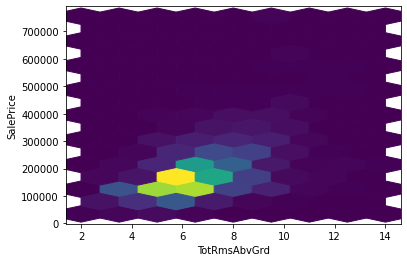

In [230]:
plt.hexbin(data1['TotRmsAbvGrd'],data1['SalePrice'] , gridsize=(8,8) )
plt.ylabel('SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.show()

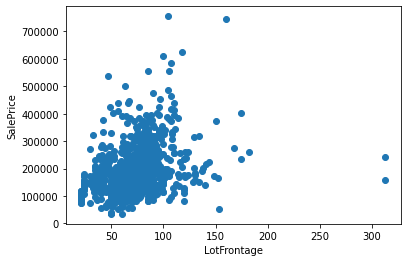

In [231]:
plt.scatter(data1['LotFrontage'],data1['SalePrice'] )
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
plt.show()

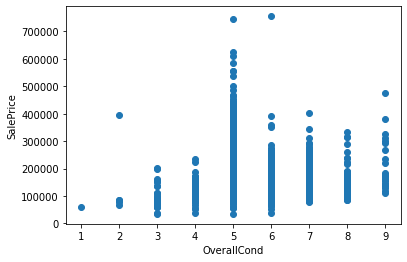

In [232]:
plt.scatter(data1['OverallCond'],data1['SalePrice'] )
plt.ylabel('SalePrice')
plt.xlabel('OverallCond')
plt.show()

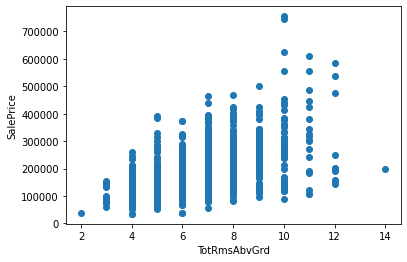

In [233]:
plt.scatter(data1['TotRmsAbvGrd'],data1['SalePrice'] )
plt.ylabel('SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.show()

## فاز یک:

یکی دیگر از روش های پر کردن داده های گم شده پر کردن آن با یک مقدار ثابت و دیفالت است که به این منظور انتخاب شده است. یا پر کردن آن خانه با استفاده از بیش ترین مقداری که در آن ستون تکرار شده است که هر دو روش گفته شده قابل استفاده برای ستون ها با هر تایپی می باشد. در صورتی که روش هایی مانند پر کردن با استفاده از داده های آماری مثل میانگین قابل پیاده سازی روی ستون هایی با مقادیر مثلا string نیستند. همچنین حذف یک ستون به طور کامل به دلیل از دست دادن برخی اطلاعات کار مناسبی نیست چرا که آن ستون ممکن است حاوی اطلاعات مهمی باشد که بتواند روی نتیجه و پیش بینی های ما اثر بگذارد.

با استفاده از درصد به دست آمده برای هریک از ستون ها که میزان داده های گم شده ی آن هارا نمایش می دهد می توان دید که ستون های زیر بیش تریم مقدار داده ی گم شده را دارند.

Alley	93.767123

PoolQC	99.520548

MiscFeature	96.301370

Fence	80.753425

FireplaceQu	47.260274


ستون هایی که داده های زیادی از آن ها گم شده اند را می توان حذف کرد چون اطلاعاتی در اختیار ما قرار نمی دهند مانند چهار ویژگی اول که تقریبا همه ی داده ها گم شده اند و اطلاعاتی از آن ها نخواهیم داشت اما ستون های دیگر مانند ویژگی چهارم که در اینجا آمده و دیگر ستون ها که میزان گمشدگی داده در آن ها کم است باید با روش های مناسب آن ها را جایگزین کرد که در کد زیر این کار را انجام می دهیم:
در این کد ستون هایی که مقدار آن ها عددی بوده و داده ی گمشده داشتند با مقدار میانگین آن ها و ستون هایی که عددی نبودند با حالت میانگین(رشته ی average یا همان fair) جایگزین شده اند.
ستون هایی که مقدار عددی نداشتند:
MasVnrType

BsmtQual

BsmtCond

BsmtExposure

BsmtFinType1

BsmtFinType2

Electrical

FireplaceQu

GarageType

GarageYrBlt

GarageFinish

GarageQual

GarageCond


In [234]:
#data = pd.read_csv('train.csv')
data1['LotFrontage'].fillna((data1['LotFrontage'].mean()), inplace=True)
data1['MasVnrArea'].fillna((data1['MasVnrArea'].mean()), inplace=True)
data1['GarageYrBlt'].fillna((data1['GarageYrBlt'].mean()), inplace=True)
data1['MasVnrType'].fillna("CBlock", inplace=True)
data1['BsmtQual'].fillna("Fa", inplace=True)
data1['MSZoning'].fillna("RM", inplace=True)
data1['BsmtCond'].fillna("Fa", inplace=True)
data1['BsmtExposure'].fillna("Av", inplace=True)
data1['BsmtFinType1'].fillna("Rec", inplace=True)
data1['BsmtFinType2'].fillna("Rec", inplace=True)
data1['Electrical'].fillna("FuseF", inplace=True)
data1['FireplaceQu'].fillna("Fa", inplace=True)
data1['GarageType'].fillna("BuiltIn", inplace=True)
data1['GarageFinish'].fillna("Fin", inplace=True)
data1['GarageQual'].fillna("Fa", inplace=True)
data1['GarageCond'].fillna("Fa", inplace=True)
#del data1['Alley']
#del data1['PoolQC']
#del data1['MiscFeature']
#del data1['Fence']

حالا دوباره درصد داده های گم شده را برای تک تک ستون ها حساب می کنیم که این دفعه  برای ستون هایی که مقادیر گم شده جایگزین شده اند این درصد بباید 0 باشد اما برای ستون هایی که جایگزین نشده اند از آن جایی که یکی از مقادیری که می توانستند بگیرن NA , None  بوده در ادامه جایگزینی صورت میگیرد.

In [235]:
new_percent_missing = data1.isnull().sum() * 100 / len(data1)
new_percent_missing.head(60)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley           93.767123
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [236]:
new_percent_missing.tail(17)

GarageCond        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
PoolQC           99.520548
Fence            80.753425
MiscFeature      96.301370
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
dtype: float64

در روش normalization داده ها شیفت خورده و rescale می شوند و در نهایت مقادیرشان بین 0 تا 1 قرار می گیرد در این روش زمانی که x ای انتخاب می کنیم کوچک ترین مقدار در ستون باشد مقدار normalize شده آن 0 خواهد شد و اگر x بزرگ ترین داده در ستون باشد مقدار normalize آن برابر یک می شود و اگر x  ها بین این دو باشند مقادیر بین 0 و 1 را خواهند گرفت.این تکنیک سرعت یادگیری را بالا برده و از numeric overflow جلوگیری می کند. در تکنیک standardization مقادیر داده ها به وسیله ی انحراف معیار حول میانگین متمرکز شده اند که این موجب می شود میانگین 0 و انحراف معیار 1 داشته باشیم.  در unsupervised learning استفاده از standardization به صرفه تر و اثربخش تر است هم چنین اگر مقادیر خییلی کوچک یا خییلی بزرگ داشته باشیم standardization بهتر است چون normalization مقادیر را در بازه کوچکی مدل می کند.
به طور معمول از تکنیک های normalization  زمان هایی استفاده می شود که ما می دانیم توزیع داده های ما از نوع gussian نیست و تکنیک standardization بیش تر زمانی استفاده می شود که می دانیم داده ها از توزیع گاوسی پیروی می کنند.البته در کل قانونی وجود ندارد برای این که بفهمیم استفاده از کدام تکنیک بهتر است و همه چیز به داده های ما و استفاده ای که از آن ها داریم برمی گردد.
به نظر من در این پروژه نیازی به استاندارد کردن داده ها نداریم چون لزومی ندارد که مقادیر داده ها بین 0 و 1 قرار گیرند و همچنین تعداد داده های هم زیاد نیست.

categorical data به معنای داده های دسته ای اند.که در آن داده ها برچسب های غیر عددی می پذیرند که می تواند به سه حالت باشد:
1) برچسب های باینری: برای داده هایی استفاده می شوند که دارای دو مقدار اند مانند بله یا خیر یا درست و غلط
2) برچسب های ترتیبی: مانند اول و دوم و سوم
3)برچسب های nominal:که برچسب هایی مانند رنگ می باشد که این رنگ می تواند مقادیر مختلفی مانند زرد و قرمزو... داشته باشد.
اما می دانیم که کار کردن با داده های عددی راحت تر است به همین خاطر از متد های زیر استفاده می کنیم:
1)برای داده های باینری که تنها دو مقدار می گیرند می توان آن ها را به وسیله ی تابع replace با اعداد 0 و 1 جایگزین نمود.
2)برای داده های ترتیبی از integer encoding استفاده می کنیم که مثلا برای "اول" عدد1 و برای "دوم" عدد2 و ... را در نظر می گیریم.برای این کار می توان از دو تابع lableEncoder , map استفاده کرد.
3) برای داده های nominal می توان از one-hot encoding  استفاده کرد.زیرا که در این حالت مقداری بر مقدار دیگر اولویت ندارد و ترتیب برایمان بی اهمیت است. مثلا اگر ستونی با نام رنگ داشته باشیم که مقادیر خانه های این ستون زرد و قرمز و آبی باشد برای هر یک به ترتیب این کد ها را در نظر می گیریم:100و010و001
که برای این کار می توان از تابع get_dummies استفاده کرد

برای داده هایی که تعداد مقادیری که می توانند بگیرند خیلی زیاد است یعنی تنوع زیادی دارند ولی بعضی از مقادیر به تعداد کمی از خانه ها assign شده است می توان تایپ آن ها را other قرار داد.
راه دیگری که برای داده های دسته ای داریم این است که آن ها را حذف کنیم که معلوم است که این راه ، بهترین راه نیست.


لازم نیست همه ی ستون ها را نگه داریم و می توان ستون هایی که درصد داده های گم شده ی آنان خیلی زیاد است را حذف کنیم. هم چنین چون می خواهیم قیمت خانه را پیش بینی کنیم با توجه به نمودار وابستگی ها می توان ویژگی هایی که قیمت خانه از آن ها مستقل است را حذف کنیم چرا که در تصمیم گیری برای پیش بینی قیمت خانه تاثیری ندارد.
مانند KitchenAbvGr , MSSubClass , BedroomAvbGr , ...

In [237]:
data1.Alley = data1.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
data1.BsmtCond =  data1.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.BsmtExposure = data1.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
data1['BsmtFinType1'] = data1['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
data1['BsmtFinType2'] = data1['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
data1.BsmtQual = data1.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.ExterCond = data1.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.ExterQual = data1.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.FireplaceQu = data1.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.Functional = data1.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
data1.GarageCond = data1.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.GarageQual = data1.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.HeatingQC = data1.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.KitchenQual = data1.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data1.LandSlope = data1.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
data1.PavedDrive = data1.PavedDrive.map({'N':1, 'P':2, 'Y':3})
data1.PoolQC = data1.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
data1.Street = data1.Street.map({'Grvl':1, 'Pave':2})
data1.Utilities = data1.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})
data1.MSZoning = data1.MSZoning.map({'A':1, 'C':2, 'FV':3, 'I':4 , 'RH':5 ,  'RL':6 ,  'RP':7 ,  'RM':8})
data1.LotShape = data1.LotShape.map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})
data1.LandContour = data1.LandContour.map({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4})
data1.LotConfig = data1.LotConfig.map({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4 , 'FR3':5})
data1.MasVnrType = data1.MasVnrType.map({'BrkCmn':1, 'BrkFace':2, 'CBlock':3, 'None':4 , 'Stone':5})
data1.CentralAir = data1.CentralAir.map({'N':1, 'Y':2})
data1.MasVnrType = data1.MasVnrType.map({'BrkCmn':1, 'BrkFace':2, 'CBlock':3, 'None':4 , 'Stone':5})
data1['MSZoning'].fillna(8, inplace=True)
del data1['Neighborhood']
del data1['Condition1']
del data1['Condition2']
del data1['BldgType']
del data1['HouseStyle']
del data1['RoofStyle']
del data1['RoofMatl']
del data1['Exterior1st']
del data1['Exterior2nd']
del data1['Foundation']
del data1['Heating']
del data1['Electrical']
del data1['Functional']
del data1['GarageType']
del data1['GarageFinish']
del data1['Fence']
del data1['MiscFeature']
del data1['SaleType']
del data1['SaleCondition']
del data1['Alley']
del data1['PoolQC']
del data1['MasVnrType']



تجربه ثابت کرده است که بهتر است که 80 درصد اول داده به train و مابقی آن ها به test اختصاص داده شود. اما راه های دیگری برای این تقسیم وجود دارد مانند 90 /20 که فقط زمانی مناسب است که سایز داده کوچک باشد. در کل تقسیم بندی های زیر مرسوم است:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

بهتر است که تقسیم داده ها به صورت رندم صورت گیرد زیرا ممکن است مثلا ده خانه ی اول و آخر از یک منطقه با ویژگی های نزدیک به هم باشد که میتوانیم حدس بزنیم مدل ما آن ها را به خوبی حدس میزند و پیش بینی می کند. پس بهتر است داده های test , train به صورت رندم انتخاب شوند. اما حالتی وجود دارد که می خواهیم هر دفعه که داده هارا به دو قسمت test , train  تقسیم بندی می کنیم یک نتیجه را بگیریم که در این صورت باید آپشنrandom_state=1 به 1 ست شود.

In [238]:
X = data1.iloc[:, :-1].values
y = data1.iloc[:,58].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## فاز دو:

 در این فار سه مدل classifire پیاده سازی شده است .سپس به وسیله ی آن ها نتایج ابتدا روی داده های test و سپس روی داده های train پیش بینی شده است. در هر مرحله برای راحتی در دین نتایج ، ابتدا دیتافریمی نمایش داده شده است که مربوط به داده های تست است و پس از آن دیتا فریمی نمایش داده شده که مربوط به داده های train می باشد. همچنین در پایان هر مرحله مقدار ارور ها در دوحالت MAE , RSME برای داده های test , train  محاسبه شده است.

In [239]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [240]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)
y_pred1_2=classifier.predict(X_train)
df1= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
df1

,Actual,Predicted
0,127500,139900
1,176000,107000
2,175000,127000
3,287000,191000
4,211000,165000
...,...,...
287,276000,228500
288,219500,210000
289,180500,134900
290,302000,180000


In [241]:
df1_2= pd.DataFrame({'Actual': y_train, 'Predicted': y_pred1_2})
df1_2

,Actual,Predicted
0,128900,110000
1,201000,201000
2,210000,143000
3,325624,307000
4,140000,117000
...,...,...
1163,93000,52000
1164,252678,207500
1165,176000,168500
1166,105000,68400


In [242]:
print("test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred1_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred1_2)))

test
Mean Absolute Error: 38157.568493150684
Root Mean Squared Error: 56873.0669853057
train
Mean Absolute Error: 33712.08561643836
Root Mean Squared Error: 54714.93528247798


In [243]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
y_pred2_2 = dtc.predict(X_train)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df2

,Actual,Predicted
0,127500,194201
1,176000,165000
2,175000,140000
3,287000,233000
4,211000,201000
...,...,...
287,276000,446261
288,219500,239000
289,180500,160000
290,302000,275000


In [244]:
df2_2 = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred2_2})
df2_2

,Actual,Predicted
0,128900,128900
1,201000,201000
2,210000,210000
3,325624,325624
4,140000,140000
...,...,...
1163,93000,93000
1164,252678,252678
1165,176000,176000
1166,105000,105000


In [245]:
print("test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred2_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred2_2)))

test
Mean Absolute Error: 34094.33904109589
Root Mean Squared Error: 53216.23818386434
train
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


In [246]:
r0=LinearRegression()
r0.fit(X_train, y_train)
y_pred3 = r0.predict(X_test)
y_pred3_2 = r0.predict(X_train)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
df3

,Actual,Predicted
0,127500,172549.348623
1,176000,172092.234206
2,175000,204632.383225
3,287000,257346.542126
4,211000,213766.940434
...,...,...
287,276000,315384.145240
288,219500,254736.176997
289,180500,160555.358494
290,302000,306007.883225


In [247]:
df3_2 = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred3_2})
df3_2

,Actual,Predicted
0,128900,110751.586608
1,201000,243929.939011
2,210000,229509.778688
3,325624,309167.145240
4,140000,149296.393817
...,...,...
1163,93000,106299.264228
1164,252678,231908.939011
1165,176000,190091.883225
1166,105000,95387.519519


In [248]:
print("test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print("train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred3_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred3_2)))

test
Mean Absolute Error: 20430.885451613343
Root Mean Squared Error: 31579.18240582802
train
Mean Absolute Error: 20101.1706677093
Root Mean Squared Error: 32516.221002780752


overfitting به این معناست که مدل کردن داده ی واقعی تمام شده است و در واقع داریم نویز ها را هم مدل می کنیم و در این حالت روی داده های train خیلی خوب عمل می کنیم اما روی داده های تست عملکرد ضعیفی داریم ، در این حالت واریانس بالاست. و underfitting  به این معناست که بایاس بالاست. و حتی روی داده ی اصلی هم به خوبی جواب نمی دهد یعنی حتی روی داده های train هم عملکرد خوبی نداریم.  همان طور که میبینیم مدل ما در حالت DecisionTree دچار overfitting شده است . هم چنین در حالت KNN  میبینیم که خطای داده های train , test بسیار نزدیک به هم است پس مدل ما روی هیچ کدام از داده ها عملکرد خوبی نداشته است پس underfitting داریم.

### فاز سه:

In [249]:
r1 = RandomForestRegressor(n_estimators=20, random_state=0)
r1.fit(X_train, y_train)
y_pred4 = r1.predict(X_test)
y_pred4_2 = r1.predict(X_train)
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
df4

,Actual,Predicted
0,127500,156347.50
1,176000,151785.00
2,175000,152870.00
3,287000,253691.40
4,211000,211429.50
...,...,...
287,276000,318687.85
288,219500,230227.50
289,180500,142945.45
290,302000,266289.50


In [250]:
df4_2 = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred4_2})
df4_2

,Actual,Predicted
0,128900,129610.00
1,201000,214679.50
2,210000,208126.20
3,325624,310726.65
4,140000,142570.00
...,...,...
1163,93000,97110.00
1164,252678,233552.60
1165,176000,175405.00
1166,105000,100935.00


In [251]:
print("test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print("train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4_2)))

test
Mean Absolute Error: 18312.470547945202
Root Mean Squared Error: 29677.834948251664
train
Mean Absolute Error: 7054.57915239726
Root Mean Squared Error: 11487.555307882847


In [252]:
voting_clf = VotingClassifier(estimators=[('KNN', classifier),('DTree', dtc)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)
preds_n = voting_clf.predict(X_train)
#acc = accuracy_score(y_test, preds)
#l_loss = log_loss(y_test, preds)
#f1 = f1_score(y_test, preds)
#print("Accuracy is: " + str(acc))
#print("Log Loss is: " + str(l_loss))
#print("F1 Score is: " + str(f1))
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
df5

,Actual,Predicted
0,127500,139900
1,176000,107000
2,175000,127000
3,287000,191000
4,211000,165000
...,...,...
287,276000,228500
288,219500,210000
289,180500,134900
290,302000,180000


In [253]:
df5_1 = pd.DataFrame({'Actual': y_train, 'Predicted': preds_n})
df5_1

,Actual,Predicted
0,128900,110000
1,201000,201000
2,210000,143000
3,325624,307000
4,140000,117000
...,...,...
1163,93000,52000
1164,252678,207500
1165,176000,168500
1166,105000,68400


In [254]:
print("test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,preds)))
print("train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,preds_n))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,preds_n)))

test
Mean Absolute Error: 40081.22602739726
Root Mean Squared Error: 58956.14877735429
train
Mean Absolute Error: 33429.33732876712
Root Mean Squared Error: 54593.265102872036


اگر چندین مدل (خوب) داشته باشیم سطح اطمینان ما از نتیجه و پیش بینی ای که می کنیم بالا می رود. چون زمان تصمیم گیری ما به جای اینکه ما به نظر یک مدل نگاه کنیم، به نظر چندین مدل نگاه می کنیم و طبق رای جمع تصمیم میگیریم و در این حالت ما سطح اطمینان بالایی داریم.
  

می دانیم مدلی بهتر است که RSME کم تری داشته باشد و از بین مدل های فاز دوم و voting مقدار RSME برای voting و KNN بسیار نزدیک هم است و این مقدار از بقیه ی مدل ها کم تر است.